## Imports

In [1]:
import time
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from utils import OD_Assemble
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from tensorflow.keras.preprocessing.image import img_to_array,load_img

from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Models

In [2]:
start_time = time.time()
MODEL_LIST = os.listdir('exported-models')
MODEL_LIST_OTH = os.listdir('exported-models-oth')
loaded_model_lst = dict()
# for mdl in MODEL_LIST[2:-1]:
for mdl in MODEL_LIST:
    # mdl_pth = "../exported-models/"+mdl[:-9]+"/saved_model"
    mdl_pth = "exported-models/"+mdl+"/saved_model"
    loaded_model_lst[mdl] = tf.saved_model.load(mdl_pth)
    print("loaded model -> ",mdl)
    # print(mdl_pth)
    
for mdl in MODEL_LIST_OTH:
    mdl_pth = "exported-models-oth/"+mdl+"/saved_model"
    loaded_model_lst[mdl] = tf.saved_model.load(mdl_pth)
    print("loaded model -> ",mdl)

PATH_TO_LABELS = "annotations/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)
df = pd.read_csv('annotations/csvs/uncropped_res_capped_balanced/test.csv')
print('Done! Took {} seconds'.format(time.time() - start_time))

loaded model ->  faster_rcnn_inception_resnet_v2_640x640
loaded model ->  faster_rcnn_resnet101_v1_1024x1024
loaded model ->  faster_rcnn_resnet101_v1_640x640
loaded model ->  faster_rcnn_resnet152_v1_640x640
loaded model ->  faster_rcnn_resnet152_v1_800x1333
loaded model ->  faster_rcnn_resnet50_v1_640x640
loaded model ->  centernet_resnet101_v1_512x512


loaded model ->  efficientdet_d1
loaded model ->  ssd_resnet152_v1_fpn_640x640
Done! Took 649.5859072208405 seconds


In [25]:
def show_inference(model,loca):
      test_image_o = cv2.imread(loca)
      test_image_rgb = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB)
      test_image_array_ex = np.expand_dims(test_image_rgb, axis=0)

      test_image_tensor = tf.convert_to_tensor(test_image_array_ex)
      test_image_tensor = tf.cast(test_image_tensor, tf.uint8) 

      with tf.device('/cpu:0'):
            prediction = model(test_image_tensor)
        
      num_bboxes = int(prediction.pop('num_detections'))
      prediction = {key: value[0, :num_bboxes].numpy() for key, value in prediction.items()}
      prediction['num_detections'] = num_bboxes
          
      # detection_classes should be ints.
      prediction['detection_classes'] = prediction['detection_classes'].astype(np.int64)
              

      image_with_detections = test_image_rgb.copy()
      viz_utils.visualize_boxes_and_labels_on_image_array(
            image_with_detections,
            prediction['detection_boxes'],
            prediction['detection_classes'],
            prediction['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.5,
            agnostic_mode=False)
      # return cv2.cvtColor(image_with_detections, cv2.COLOR_RGB2BGR)
      return Image.fromarray(image_with_detections)
      return image_with_detections

In [23]:
FINAL_MDL_LST = list()
for mdll in loaded_model_lst.items():
    FINAL_MDL_LST.append(mdll[0])
    print(mdll[0])

faster_rcnn_inception_resnet_v2_640x640
faster_rcnn_resnet101_v1_1024x1024
faster_rcnn_resnet101_v1_640x640
faster_rcnn_resnet152_v1_640x640
faster_rcnn_resnet152_v1_800x1333
faster_rcnn_resnet50_v1_640x640
centernet_resnet101_v1_512x512
efficientdet_d1
ssd_resnet152_v1_fpn_640x640


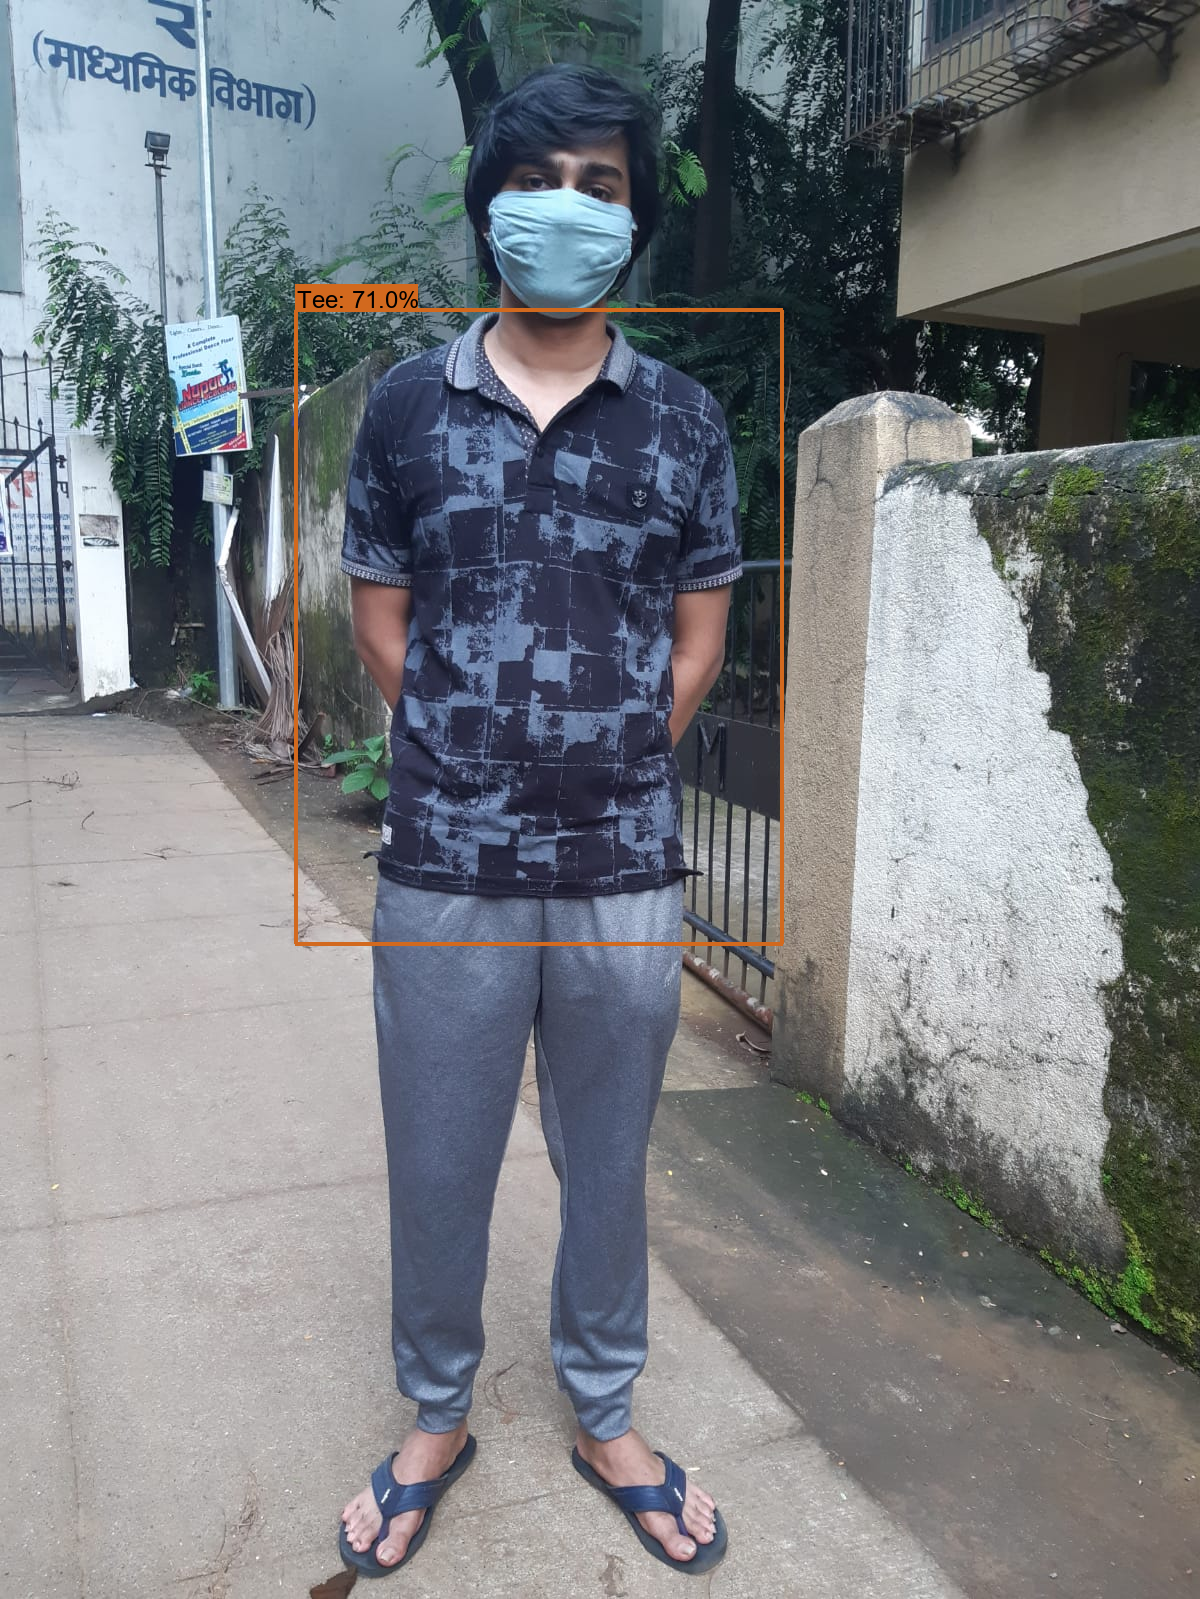

In [30]:
img_number = 2  # Change this number to try different images, number should be between 0 and 6 (including)
mdl_no = 1 # Select the model number according to the above numbering
# img_lst = os.listdir('/content/drive/MyDrive/NWF/images/singletons')
# image_with_detections = combine.NWfb('/content/drive/MyDrive/NWF/images/singletons/'+img_lst[img_number],operator=2,visualize=1) #def NWfb(self,image_path,operator=1,visualize=0):
img_lst = os.listdir('images/singletons')
show_inference(loaded_model_lst[FINAL_MDL_LST[mdl_no]],'images/singletons/'+img_lst[img_number]) #def NWfb(self,image_path,operator=1,visualize=0):

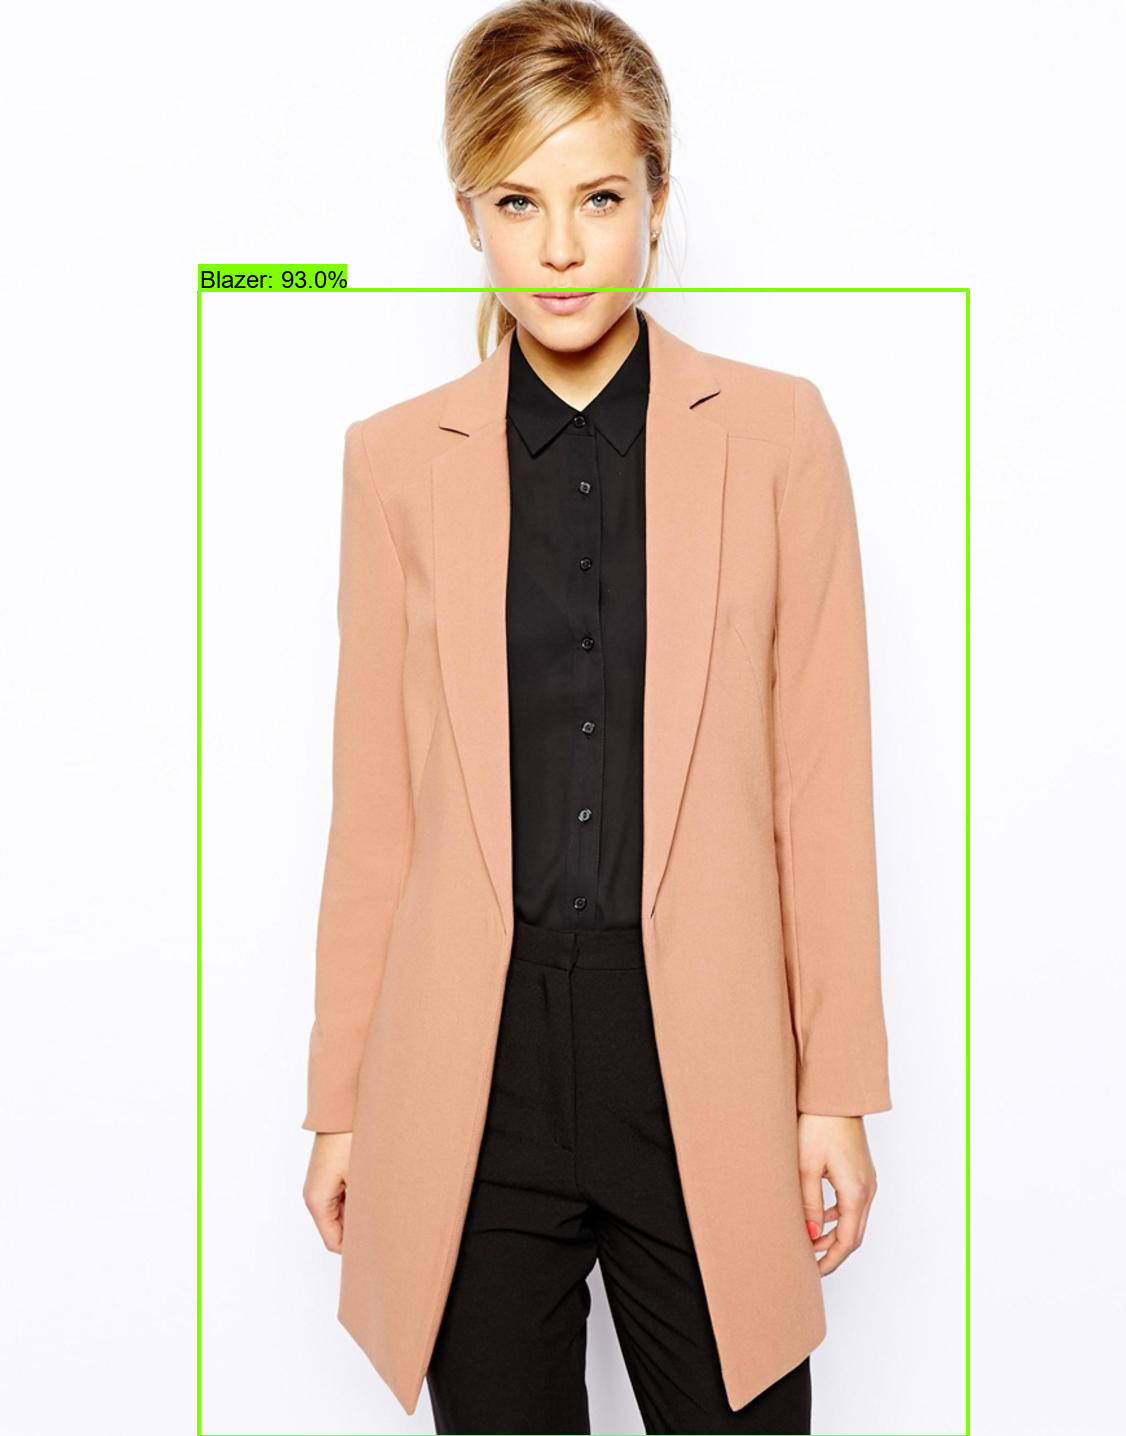

In [34]:
loc = 15  # Change this number to try different images, please try multiple numbers as 1/3rd of dataset has got crashed due to faulty indexing of Google Drive
# the above number should be between 0 and 15599
show_inference(loaded_model_lst[FINAL_MDL_LST[mdl_no]],'images/dataset/'+df['filename'][loc])